In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_data():
    url = './datasets/nigeria_food_prices.csv'
    df = pd.read_csv(url)
    return df

In [3]:
df = get_data()
df.head(3)

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,182.0,Nigeria,2211,Adamawa,1980,Mubi,55,Bread - Retail,0.0,NGN,15,Retail,33,Unit,1,2015,140.0,NaN
1,182.0,Nigeria,2211,Adamawa,1980,Mubi,55,Bread - Retail,0.0,NGN,15,Retail,33,Unit,2,2015,140.0,NaN
2,182.0,Nigeria,2211,Adamawa,1980,Mubi,55,Bread - Retail,0.0,NGN,15,Retail,33,Unit,3,2015,140.0,NaN


In [4]:
df.shape

(50285, 18)

In [5]:
df.columns

Index(['adm0_id', 'adm0_name', 'adm1_id', 'adm1_name', 'mkt_id', 'mkt_name',
       'cm_id', 'cm_name', 'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id',
       'um_name', 'mp_month', 'mp_year', 'mp_price', 'mp_commoditysource'],
      dtype='object')

In [6]:
df.isnull().sum()

adm0_id                   0
adm0_name                 0
adm1_id                   0
adm1_name                 0
mkt_id                    0
mkt_name                  0
cm_id                     0
cm_name                   0
cur_id                    0
cur_name                  0
pt_id                     0
pt_name                   0
um_id                     0
um_name                   0
mp_month                  0
mp_year                   0
mp_price                  0
mp_commoditysource    50285
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50285 entries, 0 to 50284
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   adm0_id             50285 non-null  float64
 1   adm0_name           50285 non-null  object 
 2   adm1_id             50285 non-null  int64  
 3   adm1_name           50285 non-null  object 
 4   mkt_id              50285 non-null  int64  
 5   mkt_name            50285 non-null  object 
 6   cm_id               50285 non-null  int64  
 7   cm_name             50285 non-null  object 
 8   cur_id              50285 non-null  float64
 9   cur_name            50285 non-null  object 
 10  pt_id               50285 non-null  int64  
 11  pt_name             50285 non-null  object 
 12  um_id               50285 non-null  int64  
 13  um_name             50285 non-null  object 
 14  mp_month            50285 non-null  int64  
 15  mp_year             50285 non-null  int64  
 16  mp_p

In [8]:
# drop cols we dont need 
all_cols = ['adm0_id', 'adm0_name', 'adm1_id', 'adm1_name', 'mkt_id', 'mkt_name',
       'cm_id', 'cm_name', 'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id',
       'um_name', 'mp_month', 'mp_year', 'mp_price', 'mp_commoditysource']

cols_to_drop = ['adm0_id', 'adm1_id', 'mkt_id',
                'cm_id', 'cur_id','pt_id','um_id',
                'mp_commoditysource']

In [9]:
df = df.drop(columns=cols_to_drop)

In [10]:
df.columns

Index(['adm0_name', 'adm1_name', 'mkt_name', 'cm_name', 'cur_name', 'pt_name',
       'um_name', 'mp_month', 'mp_year', 'mp_price'],
      dtype='object')

In [11]:
# rename the cols 
new_names = {'adm0_name': 'country',
     'adm1_name': 'state',
     'cm_name': 'produce', 
     'cur_name': 'currency',
     'mp_month': 'month',
     'mp_year': 'year',
     'mp_price': 'price',
     'pt_name': 'market_type',
     'um_name': 'quantity',
     'mkt_name': 'market'}

In [12]:
df = df.rename(columns= new_names)

In [13]:
df.head(3)

,country,state,market,produce,currency,market_type,quantity,month,year,price
0,Nigeria,Adamawa,Mubi,Bread - Retail,NGN,Retail,Unit,1,2015,140.0
1,Nigeria,Adamawa,Mubi,Bread - Retail,NGN,Retail,Unit,2,2015,140.0
2,Nigeria,Adamawa,Mubi,Bread - Retail,NGN,Retail,Unit,3,2015,140.0


# Pivot tables

In [16]:
# aggregate your data using pivot tables 
# syntax
# pd.pivot_table(data, value='', columns='', aggfunc='')
table = pd.pivot_table(df, index=["state","market","year"],
                      values=["price"], aggfunc='mean')

In [17]:
table

price
state   market       year              
Abia    Aba          2014   1124.053125
                     2015   1047.285208
                     2016   1248.266333
                     2017  19126.572430
                     2021  17688.662142
...                                 ...
Zamfara Kaura Namoda 2017  14279.382074
                     2018  10343.343618
                     2019   6882.110357
                     2020   8500.881441
                     2021  11207.938117

[318 rows x 1 columns]

In [21]:
table = pd.pivot_table(df, index=["state","market","year"],
                      values=["price"], aggfunc='sum')

In [22]:
table

price
state   market       year              
Abia    Aba          2014  2.697728e+04
                     2015  5.026969e+04
                     2016  5.242719e+04
                     2017  2.046543e+06
                     2021  1.061320e+06
...                                 ...
Zamfara Kaura Namoda 2017  3.084347e+06
                     2018  2.223819e+06
                     2019  1.576003e+06
                     2020  2.932804e+06
                     2021  1.344953e+06

[318 rows x 1 columns]

In [23]:
df.isnull().sum()

country        0
state          0
market         0
produce        0
currency       0
market_type    0
quantity       0
month          0
year           0
price          0
dtype: int64

In [24]:
table.query("state == ['Abia']") # search within the pivot table 

price
state market year              
Abia  Aba    2014  2.697728e+04
             2015  5.026969e+04
             2016  5.242719e+04
             2017  2.046543e+06
             2021  1.061320e+06

In [25]:
# convert the pivot table back to a DataFrame 
df2 = table.reset_index()
df2.head(3)

,state,market,year,price
0,Abia,Aba,2014,26977.275
1,Abia,Aba,2015,50269.690
2,Abia,Aba,2016,52427.186


<AxesSubplot:>

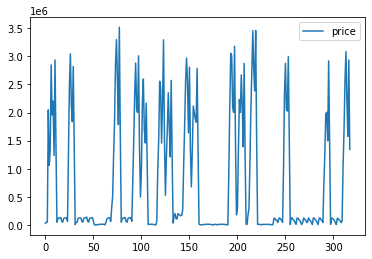

In [26]:
df2[['state','price']].plot(kind='line')

In [28]:
pvt = pd.pivot_table(df, index=['state','market','produce','year'],
                    values=['price'], aggfunc='mean')
pvt

price
state   market       produce         year              
Abia    Aba          Bread - Retail  2014    239.212500
                                     2015    247.521458
                                     2016    182.228000
                                     2017    150.250000
                                     2021    100.000000
...                                                 ...
Zamfara Kaura Namoda Yam - Wholesale 2017  25200.000000
                                     2018  31800.000000
                                     2019  26880.000000
                                     2020  29784.875000
                                     2021  29847.500000

[5909 rows x 1 columns]

In [30]:
pvt_df = pvt.reset_index() # conert to dataframe

In [33]:
pvt_df[pvt_df['state'] == 'Abia']

,state,market,produce,year,price
0,Abia,Aba,Bread - Retail,2014,239.212500
1,Abia,Aba,Bread - Retail,2015,247.521458
2,Abia,Aba,Bread - Retail,2016,182.228000
3,Abia,Aba,Bread - Retail,2017,150.250000
4,Abia,Aba,Bread - Retail,2021,100.000000
...,...,...,...,...,...
57,Abia,Aba,Sorghum (white) - Wholesale,2021,37558.875000
58,Abia,Aba,Yam - Retail,2017,238.200000
59,Abia,Aba,Yam - Retail,2021,214.193750
60,Abia,Aba,Yam - Wholesale,2017,45040.000000
